# **1. Perkenalan Dataset**


Dalam proyek analisis eksplorasi data ini, penulis menggunakan **Palmer Penguins Dataset** yang diambil dari situs Kaggle dengan url https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda/data . Dataset ini merupakan kumpulan data hasil observasi terhadap spesies penguin yang hidup di Kepulauan Palmer, Antartika. Dataset ini sering digunakan sebagai alternatif dari dataset Iris dalam pembelajaran machine learning dan statistik, karena menyediakan fitur yang kaya untuk eksplorasi data, visualisasi, serta klasifikasi.

Dataset ini berisi informasi biologis dan geografis dari masing-masing penguin yang diamati. Secara keseluruhan, dataset ini memiliki beberapa fitur utama sebagai berikut:

* **id**: Identifikasi unik untuk setiap penguin. Fitur ini bersifat kategorikal atau numerik, dan digunakan untuk membedakan setiap entri dalam data.
* **species**: Jenis spesies penguin yang diamati. Nilai yang mungkin adalah *Adelie*, *Chinstrap*, dan *Gentoo*. Fitur ini sering dijadikan target dalam tugas klasifikasi.
* **island**: Nama pulau di Kepulauan Palmer tempat penguin diamati. Terdapat tiga pulau: *Biscoe*, *Dream*, dan *Torgersen*.
* **bill\_length\_mm**: Panjang paruh penguin dalam satuan milimeter. Fitur ini bersifat kontinu dan berguna dalam membedakan spesies.
* **bill\_depth\_mm**: Kedalaman paruh penguin dalam milimeter. Bersama dengan panjang paruh, fitur ini membantu dalam visualisasi dan analisis perbedaan antarspesies.
* **flipper\_length\_mm**: Panjang sirip penguin dalam milimeter. Fitur ini merepresentasikan karakteristik fisik penguin.
* **body\_mass\_g**: Berat badan penguin dalam gram. Digunakan untuk mengukur ukuran tubuh dan kesehatan penguin.
* **sex**: Jenis kelamin penguin (*Male*, *Female*, atau *NA* jika tidak diketahui). Fitur ini digunakan untuk menganalisis perbedaan karakteristik berdasarkan jenis kelamin.
* **year**: Tahun pengamatan dilakukan. Biasanya berupa tahun 2007, 2008, atau 2009. Fitur ini dapat digunakan untuk analisis tren dari waktu ke waktu.

Dataset ini sangat ideal untuk berbagai analisis eksploratif karena mencakup data numerik dan kategorikal yang memungkinkan pengguna untuk melakukan visualisasi distribusi, hubungan antar fitur, serta klasifikasi spesies berdasarkan karakteristik morfologi.

# **2. Import Library**

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [318]:
df = pd.read_csv('../penguins_raw.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [319]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [321]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,344.0,171.500000,99.448479,0.0,85.750,171.50,257.25,343.0
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.50,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.70,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.00,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0
year,344.0,2008.029070,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0


In [322]:
print("Shape data:",df.shape)

Shape data: (344, 9)


## 4.1. Cek Missing Values

In [323]:
# cek missing values
print("Missing values pada setiap kolom:")
df.isnull().sum()


Missing values pada setiap kolom:


id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## 4.2. Cek Data Duplikat

In [324]:
# cek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


## 4.3. Correlation Analysis

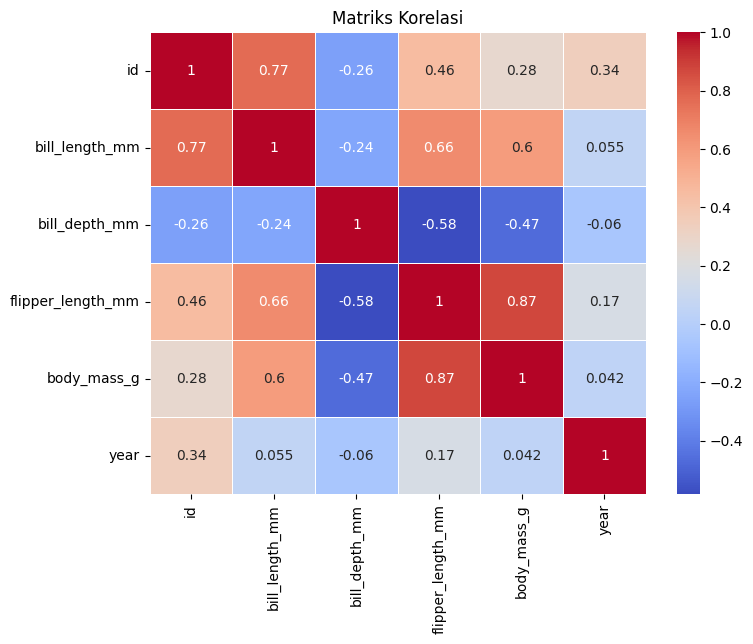

In [325]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

## 4.4. Univariate Analysis

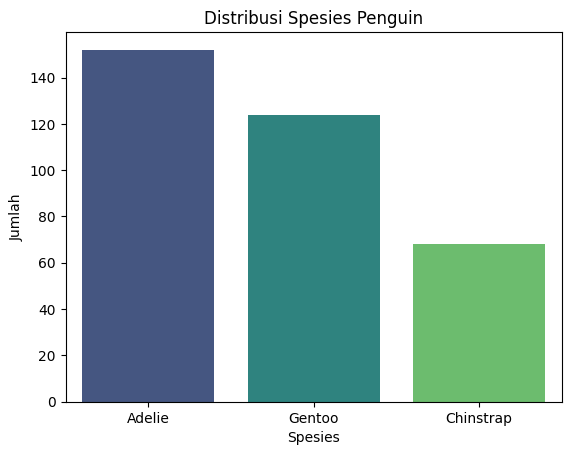

In [326]:
sns.countplot(data=df, x='species', palette='viridis')
plt.title('Distribusi Spesies Penguin')
plt.xlabel('Spesies')
plt.ylabel('Jumlah')
plt.show()

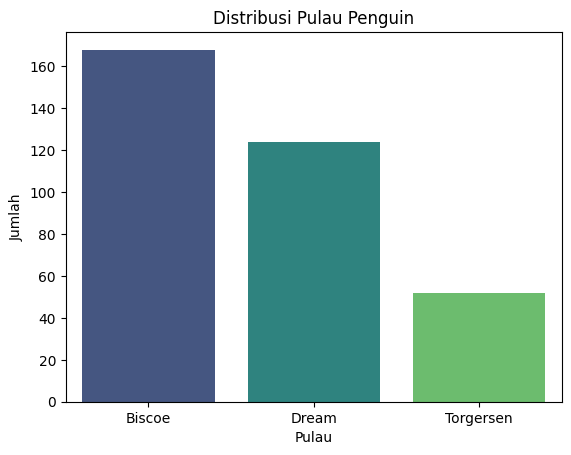

In [327]:
order = df['island'].value_counts().index
sns.countplot(data=df, x='island', order=order, palette='viridis')
plt.title('Distribusi Pulau Penguin')
plt.xlabel('Pulau')
plt.ylabel('Jumlah')
plt.show()

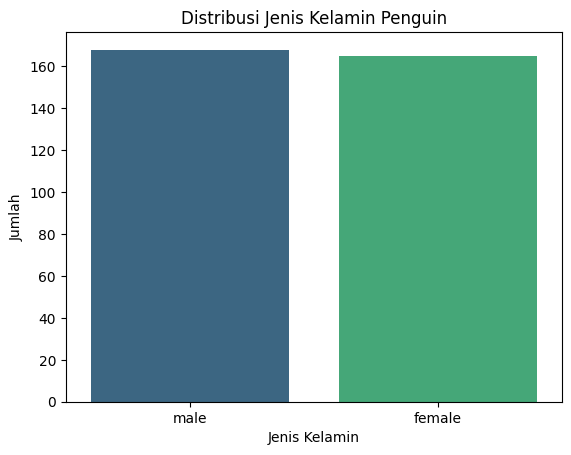

In [328]:
order = df['sex'].value_counts().index
sns.countplot(data=df, x='sex', order=order, palette='viridis')
plt.title('Distribusi Jenis Kelamin Penguin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

In [329]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for column in numerical_columns:
    fig = px.violin(df, 
                    y=column, 
                    color='species',  
                    box=True,         
                    points='all',      
                    title=f'{column}',
                    labels={column: column}
                   )
    
    fig.update_layout(
        title_font_size=24,
        xaxis_title_font_size=18,
        yaxis_title_font_size=18,
        xaxis_tickfont_size=14,
        yaxis_tickfont_size=14,
        width=700,
        height=500,
    )
    
    fig.show()

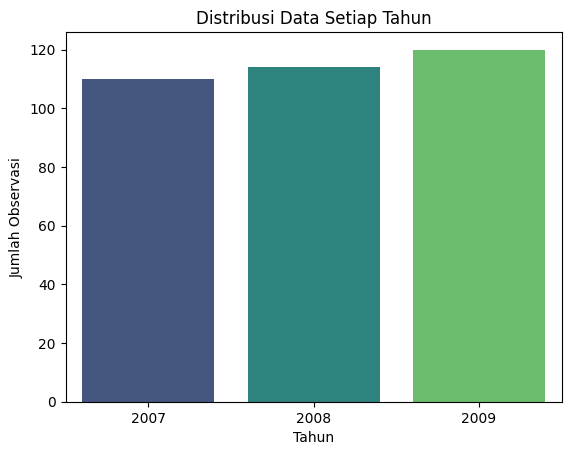

In [330]:
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Distribusi Data Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Observasi')
plt.show()

## 4.5. Bivariate Analysis

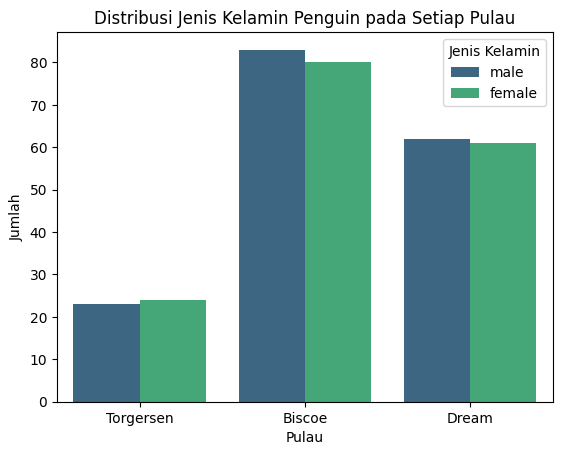

In [331]:
sns.countplot(data=df, x='island', hue='sex', palette='viridis')
plt.title('Distribusi Jenis Kelamin Penguin pada Setiap Pulau')
plt.xlabel('Pulau')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Kelamin')
plt.show()

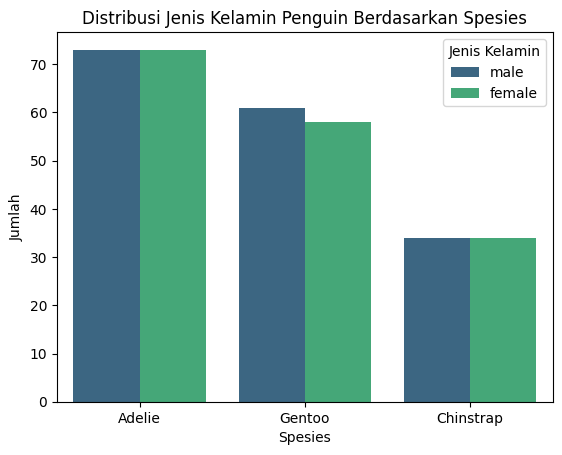

In [332]:
sns.countplot(data=df, x='species', hue='sex', palette='viridis')
plt.title('Distribusi Jenis Kelamin Penguin Berdasarkan Spesies')
plt.xlabel('Spesies')
plt.ylabel('Jumlah')
plt.legend(title='Jenis Kelamin')
plt.show()

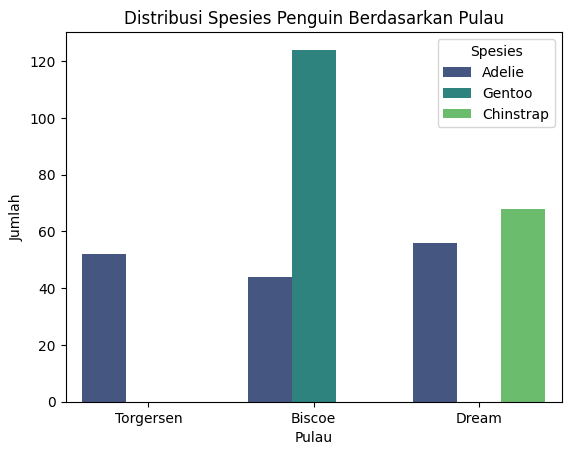

In [333]:
sns.countplot(data=df, x='island', hue='species', palette='viridis')
plt.title('Distribusi Spesies Penguin Berdasarkan Pulau')
plt.xlabel('Pulau')
plt.ylabel('Jumlah')
plt.legend(title='Spesies')
plt.show()

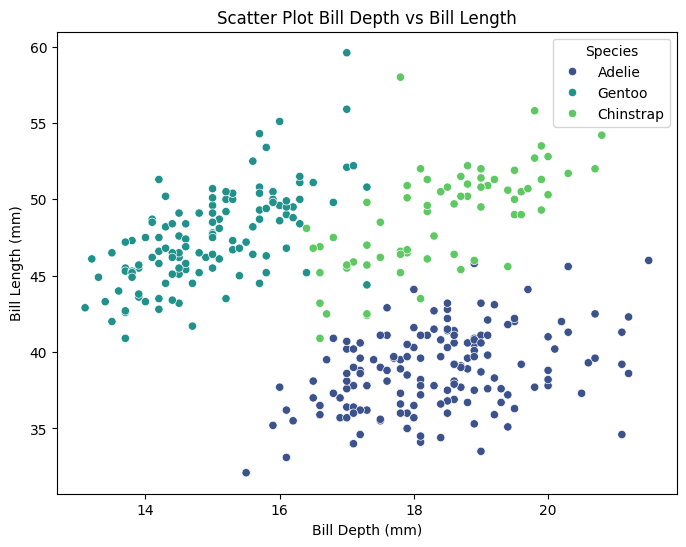

In [334]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_depth_mm', y='bill_length_mm', hue='species', palette='viridis')
plt.title('Scatter Plot Bill Depth vs Bill Length')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Bill Length (mm)')
plt.legend(title='Species')
plt.show()

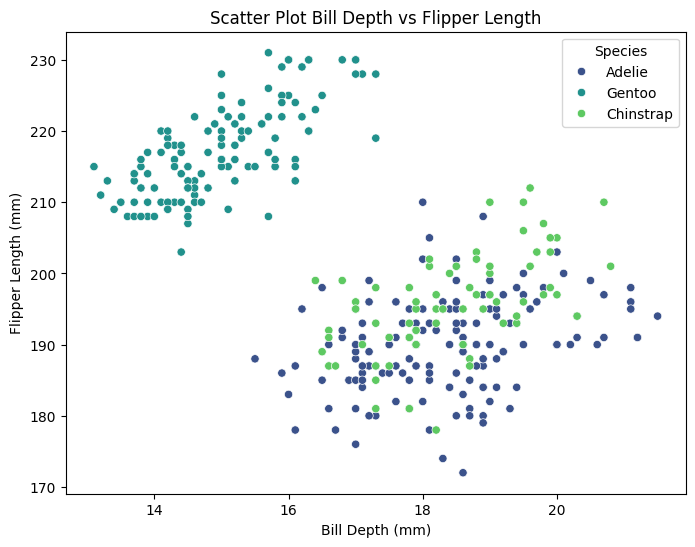

In [335]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_depth_mm', y='flipper_length_mm', hue='species', palette='viridis')
plt.title('Scatter Plot Bill Depth vs Flipper Length')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()

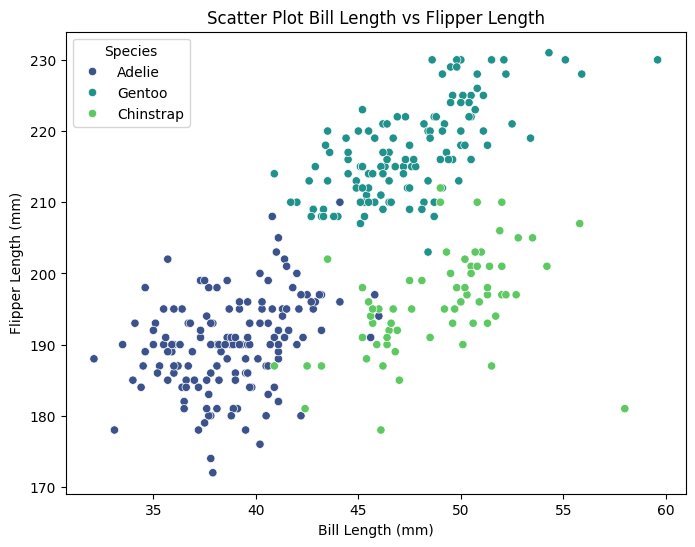

In [336]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', hue='species', palette='viridis')
plt.title('Scatter Plot Bill Length vs Flipper Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()

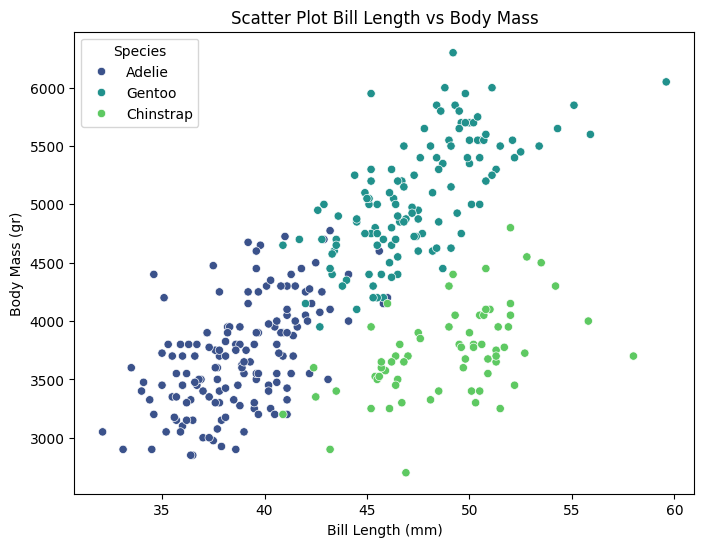

In [337]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species', palette='viridis')
plt.title('Scatter Plot Bill Length vs Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (gr)')
plt.legend(title='Species')
plt.show()

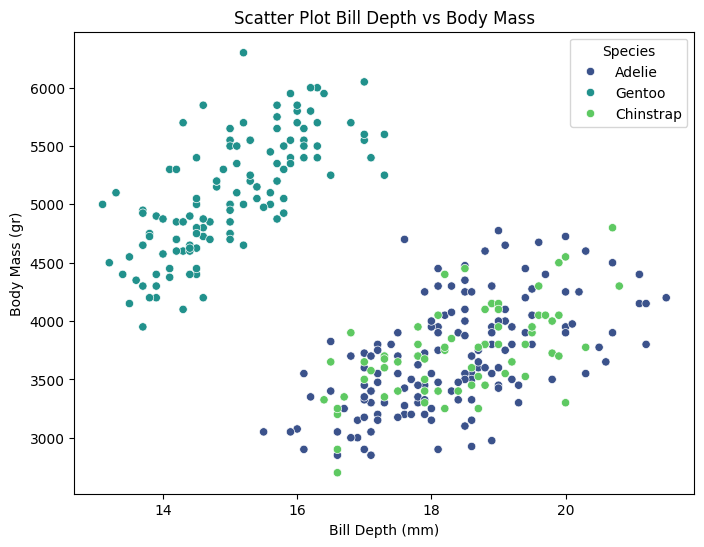

In [338]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_depth_mm', y='body_mass_g', hue='species', palette='viridis')
plt.title('Scatter Plot Bill Depth vs Body Mass')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body Mass (gr)')
plt.legend(title='Species')
plt.show()

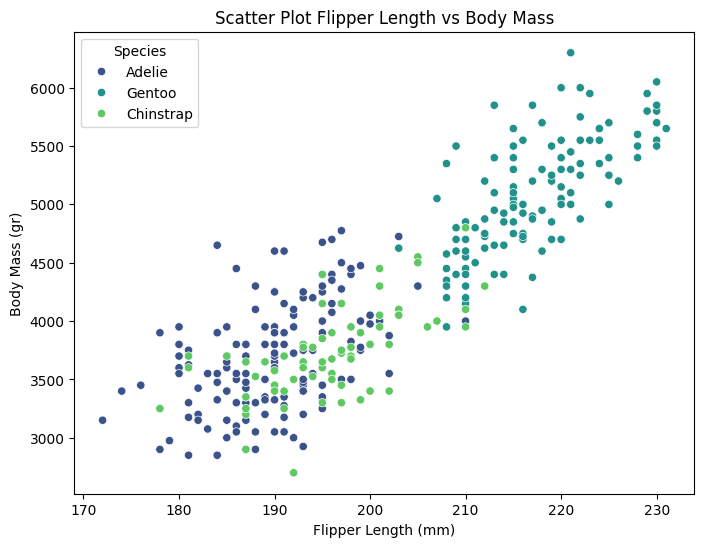

In [339]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', palette='viridis')
plt.title('Scatter Plot Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (gr)')
plt.legend(title='Species')
plt.show()

## 4.6. Pair Plot

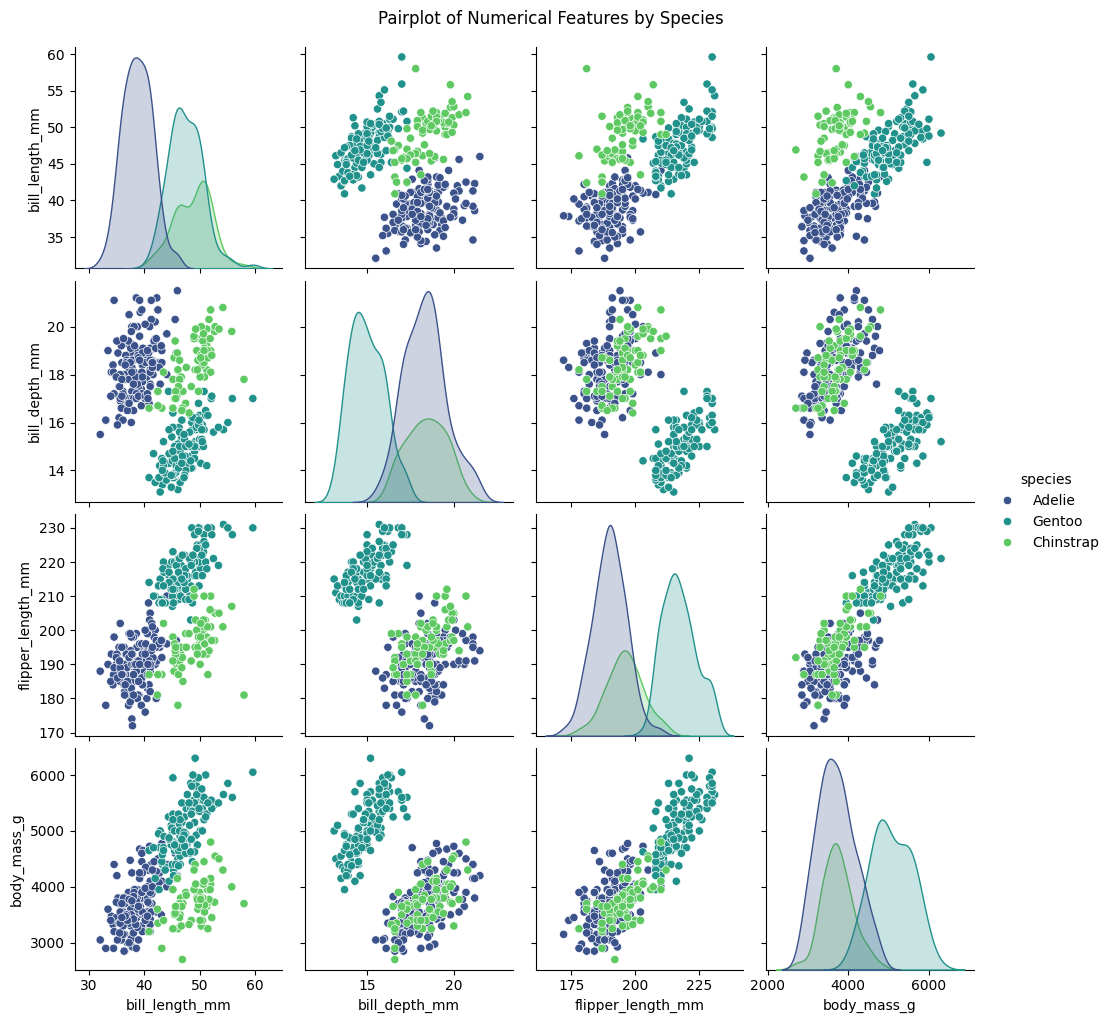

In [340]:
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

sns.pairplot(data=df, vars=numerical_cols, hue='species', palette='viridis')
plt.suptitle('Pairplot of Numerical Features by Species', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [341]:
df_preprocessing = df.copy()

## 5.1. Hapus Missing Values

In [342]:
# hapus missing values
df_preprocessing = df_preprocessing.dropna()

In [343]:
# cek kembali missing values
print("Missing values setelah penghapusan:")
df_preprocessing.isnull().sum()

Missing values setelah penghapusan:


id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## 5.2. Data Train-Test Split

In [344]:
# lakukan pemisahan fitur dan target
X = df_preprocessing.drop(columns=['species'])
y = df_preprocessing['species']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (333, 8)
Shape of y: (333,)


In [345]:
# Buang kolom 'id' karena tidak informatif
X = X.drop(columns=['id'])

In [346]:
# lakukan splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (266, 7)
Shape of X_test: (67, 7)
Shape of y_train: (266,)
Shape of y_test: (67,)


## 5.3. Encoding & Scaling

In [347]:
# Tentukan kolom fitur
categorical_cols = ['island', 'sex', 'year']  # treat year as categorical
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [349]:
# Buat ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

In [350]:
# Fit hanya ke data latih, lalu transform data uji
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [351]:
# Lihat hasil
print("Shape setelah preprocessing:")
print("X_train_processed:", X_train_processed.shape)
print("X_test_processed:", X_test_processed.shape)

Shape setelah preprocessing:
X_train_processed: (266, 12)
X_test_processed: (67, 12)


# 6. Ekspor Dataset

In [352]:
# Ambil encoder dan scaler dari preprocessor
ohe = preprocessor.named_transformers_['cat']
feature_names_cat = ohe.get_feature_names_out(categorical_cols)

# Gabungkan dengan kolom numerik
feature_names_all = list(feature_names_cat) + numerical_cols

In [353]:
# Buat dataframe hasil preprocessing
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names_all, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names_all, index=X_test.index)

# Gabungkan dengan target
train_df = X_train_df.copy()
train_df['species'] = y_train.values

test_df = X_test_df.copy()
test_df['species'] = y_test.values

# Simpan ke CSV
train_df.to_csv('penguins_train_preprocessing.csv', index=False)
test_df.to_csv('penguins_test_preprocessing.csv', index=False)